<a href="https://colab.research.google.com/github/lightsixer/P1regression/blob/dev/notebooks/Lasso_regression_P1_House_Pricing_feature_analysis_and_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSCE 5214.002

**Group 13 - Housing Price Predictor Program**

Author: Bradley Davis

**Feature analysis and data preprocessing**

Some portions make use of code from:

Kaggle challenge starter notebook:

https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf/notebook



Python Machine Learning, 3rd ed. by Sebastian Raschka , Vahid Mirjalili

https://www.packtpub.com/product/python-machine-learning-third-edition/9781789955750


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_file_path = "/content/train.csv"
test_file_path = "/content/test.csv"
dataset_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))
print("Full test dataset shape is {}".format(test_df.shape))

Full train dataset shape is (1460, 81)
Full test dataset shape is (1459, 80)


In [3]:
dataset_df = dataset_df.drop('Id', axis=1)
test_df = test_df.drop('Id', axis=1)
dataset_df.head(3)
#test_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
# The test dataset has every column except for the target (SalePrice)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

Show that the GrLivArea feature is total home living area SF (1st + 2nd floors)

In [6]:
tmp_df = dataset_df[['GrLivArea', '1stFlrSF', '2ndFlrSF']].copy()
tmp_df['LivingAreaSF'] = tmp_df['1stFlrSF'] + tmp_df['2ndFlrSF']
tmp_df.head(10)

,GrLivArea,1stFlrSF,2ndFlrSF,LivingAreaSF
0,1710,856,854,1710
1,1262,1262,0,1262
2,1786,920,866,1786
3,1717,961,756,1717
4,2198,1145,1053,2198
5,1362,796,566,1362
6,1694,1694,0,1694
7,2090,1107,983,2090
8,1774,1022,752,1774
9,1077,1077,0,1077


In [7]:
# look for missing values
nulrec = dataset_df.isnull().sum()
print(nulrec[nulrec > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [8]:
# look for missing values in the test set
nulrec = test_df.isnull().sum()
print(nulrec[nulrec > 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


Based on the above analysis we can probably just drop the Alley, PoolQC, MiscFeature and some other non-numeric features

Will also provide some defaults for Fence (NA), Alley (NA) and all Garage fields (NA)

In [9]:
#dataset_df = dataset_df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
# get rid of a few more non-numeric because the won't be part of top 10 anyway
dataset_df = dataset_df.drop([ 'PoolQC', 'MiscFeature',
                              'SaleType', 'SaleCondition', 'MoSold', 'MiscVal', 'BsmtQual',
                              'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                              'Heating', 'HeatingQC', 'Electrical', 'GarageYrBlt',
                              'FireplaceQu'], axis=1)
dataset_df = dataset_df.fillna( { 'Alley': 'NA', 'Fence': 'NA', 'GarageType': 'NA', 'GarageFinish': 'NA', 'GarageQual': 'NA', 'GarageCond': 'NA'})
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,YrSold,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,Y,0,61,0,0,0,0,NA,2008,208500
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,Y,298,0,0,0,0,0,NA,2007,181500
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,Y,0,42,0,0,0,0,NA,2008,223500


In [10]:
# also drop same features from test dataset
test_df = test_df.drop([ 'PoolQC', 'MiscFeature',
                              'SaleType', 'SaleCondition', 'MoSold', 'MiscVal', 'BsmtQual',
                              'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                              'Heating', 'HeatingQC', 'Electrical', 'GarageYrBlt',
                              'FireplaceQu'], axis=1)
test_df = test_df.fillna( { 'Alley': 'NA', 'Fence': 'NA', 'GarageType': 'NA', 'GarageFinish': 'NA', 'GarageQual': 'NA', 'GarageCond': 'NA'})
test_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,YrSold
0,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,...,TA,Y,140,0,0,0,120,0,MnPrv,2010
1,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,...,TA,Y,393,36,0,0,0,0,NA,2010
2,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,...,TA,Y,212,34,0,0,0,0,MnPrv,2010


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-11-d30ff678b0e5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


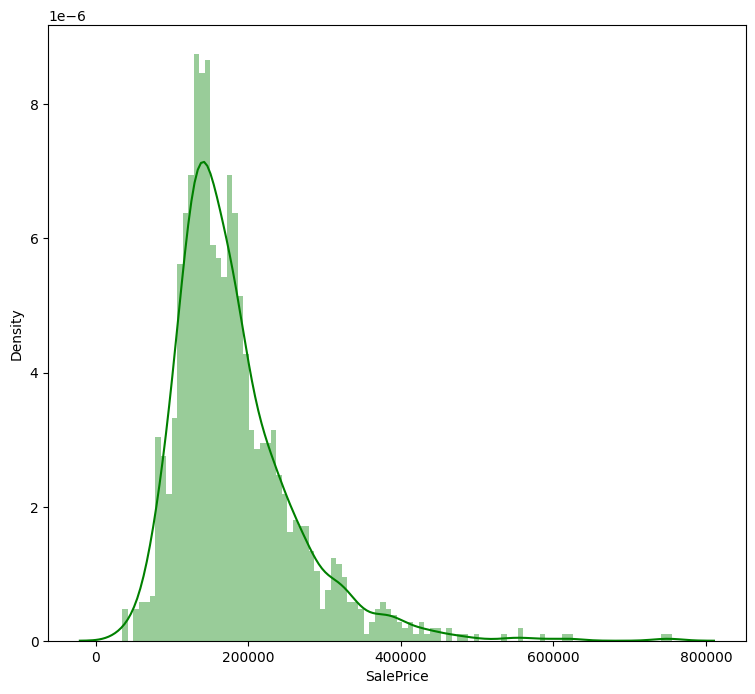

In [11]:
# here we are plotting the distribution of the target sales prices
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

-------------------------------------------------------------------------------

For the non-numeric features, some of them related to quality or condition can be mapped to an ordinal.  Others need to be converted with one-hot encoding.

In [12]:
# Let's encode some of the non-numeric fields to ordinals based on the dataset description

# Assuming zoning classifications are in order of desirability here
MSZoning_mapping = {
    'A': 0, 'C': 1, 'FV': 2, 'I': 3, 'RH': 4, 'RL': 5, 'RP': 6, 'RM': 7
}

dataset_df['MSZoning'] = dataset_df['MSZoning'].map(MSZoning_mapping)
test_df['MSZoning'] = test_df['MSZoning'].map(MSZoning_mapping)

# Paved is "better" than gravel
Street_mapping = { 'Grvl': 0, 'Pave': 1 }
dataset_df['Street'] = dataset_df['Street'].map(Street_mapping)
test_df['Street'] = test_df['Street'].map(Street_mapping)

# Alley: Paved > Gravel > No alley
Alley_mapping = { 'NA': 0, 'Grvl': 1, 'Pave': 2}
dataset_df['Alley'] = dataset_df['Alley'].map(Alley_mapping)
test_df['Alley'] = test_df['Alley'].map(Alley_mapping)

# LotShape: Reg > IR1 > IR2 > IR3
LotShape_mapping = { 'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}
dataset_df['LotShape'] = dataset_df['LotShape'].map(LotShape_mapping)
test_df['LotShape'] = test_df['LotShape'].map(LotShape_mapping)

# LandContour: Lvl > Bnk > HLS > Low
LandContour_mapping = {'Low': 0, 'HLS': 1, 'Bnk': 2, 'Lvl': 3}
dataset_df['LandContour'] = dataset_df['LandContour'].map(LandContour_mapping)
test_df['LandContour'] = test_df['LandContour'].map(LandContour_mapping)

# Utilities: AllPub > NoSewr > NoSeWa > ELO
Utilities_mapping = {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}
dataset_df['Utilities'] = dataset_df['Utilities'].map(Utilities_mapping)
test_df['Utilities'] = test_df['Utilities'].map(Utilities_mapping)

# LandSlope: Gtl > Mod > Sev
LandSlope_mapping = {'Sev': 0, 'Mod': 1, 'Gtl': 2}
dataset_df['LandSlope'] = dataset_df['LandSlope'].map(LandSlope_mapping)
test_df['LandSlope'] = test_df['LandSlope'].map(LandSlope_mapping)

# ExterQual: Ex > Gd > TA > Fa > Po
ExterQual_mapping = { 'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4 }
dataset_df['ExterQual'] = dataset_df['ExterQual'].map(ExterQual_mapping)
test_df['ExterQual'] = test_df['ExterQual'].map(ExterQual_mapping)

# ExterCond: Ex > Gd > TA > Fa > Po
ExterCond_mapping = { 'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4 }
dataset_df['ExterCond'] = dataset_df['ExterCond'].map(ExterCond_mapping)
test_df['ExterCond'] = test_df['ExterCond'].map(ExterCond_mapping)

# CentralAir: Y > N
CentralAir_mapping = { 'N': 0, 'Y': 1 }
dataset_df['CentralAir'] = dataset_df['CentralAir'].map(CentralAir_mapping)
test_df['CentralAir'] = test_df['CentralAir'].map(CentralAir_mapping)

# KitchenQual: Ex > Gd > TA > Fa > Po
KitchenQual_mapping = { 'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4 }
dataset_df['KitchenQual'] = dataset_df['KitchenQual'].map(KitchenQual_mapping)
test_df['KitchenQual'] = test_df['KitchenQual'].map(KitchenQual_mapping)

# Function: Typ > Min1 > Min2 > Mod > Maj1 > Maj2 > Sev > Sal
Functional_mapping = { 'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4,
                    'Min2': 5, 'Min1': 6, 'Typ': 7}
dataset_df['Functional'] = dataset_df['Functional'].map(Functional_mapping)
test_df['Functional'] = test_df['Functional'].map(Functional_mapping)

# Debatable, but assuming garage types are in order of general preference
GarageType_mapping = { 'NA': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6 }
dataset_df['GarageType'] = dataset_df['GarageType'].map(GarageType_mapping)
test_df['GarageType'] = test_df['GarageType'].map(GarageType_mapping)

# GarageFinish: Fin > RFn > Unf > NA
GarageFinish_mapping = { 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3 }
dataset_df['GarageFinish'] = dataset_df['GarageFinish'].map(GarageFinish_mapping)
test_df['GarageFinish'] = test_df['GarageFinish'].map(GarageFinish_mapping)

# GarageQual: Ex > Gd > TA > Fa > Po > NA
GarageQual_mapping = { 'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 }
dataset_df['GarageQual'] = dataset_df['GarageQual'].map(GarageQual_mapping)
test_df['GarageQual'] = test_df['GarageQual'].map(GarageQual_mapping)

# GarageCond: Ex > Gd > TA > Fa > Po > NA
GarageCond_mapping = { 'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 }
dataset_df['GarageCond'] = dataset_df['GarageCond'].map(GarageCond_mapping)
test_df['GarageCond'] = test_df['GarageCond'].map(GarageCond_mapping)

# PavedDrive: Y > P > N
PavedDrive_mapping = { 'N': 0, 'P': 1, 'Y': 2 }
dataset_df['PavedDrive'] = dataset_df['PavedDrive'].map(PavedDrive_mapping)
test_df['PavedDrive'] = test_df['PavedDrive'].map(PavedDrive_mapping)

# Fence: GdPrv > MnPrv > GdWo > MnWw > NA
Fence_mapping = { 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
dataset_df['Fence'] = dataset_df['Fence'].map(Fence_mapping)
test_df['Fence'] = test_df['Fence'].map(Fence_mapping)

dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1450 non-null   float64
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

-------------------------------------------------------------------------------

In [13]:
list(set(dataset_df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

With feature mapping we now have 52 instead of 37 original (non-dropped) numeric features...

In [14]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num_test = test_df.select_dtypes(include = ['float64', 'int64'])
print(df_num.shape)
print(df_num_test.shape)
df_num.head()

(1460, 52)
(1459, 51)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,YrSold,SalePrice
0,60,5.0,65.0,8450,1,0,3,3,3,2,...,2,0,61,0,0,0,0,0,2008,208500
1,20,5.0,80.0,9600,1,0,3,3,3,2,...,2,298,0,0,0,0,0,0,2007,181500
2,60,5.0,68.0,11250,1,0,2,3,3,2,...,2,0,42,0,0,0,0,0,2008,223500
3,70,5.0,60.0,9550,1,0,2,3,3,2,...,2,0,35,272,0,0,0,0,2006,140000
4,60,5.0,84.0,14260,1,0,2,3,3,2,...,2,192,84,0,0,0,0,0,2008,250000


TBD: Remaining candidate features for One-hot encoding (these are probably not suitable for ordinal mapping):

LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation

Neighborhood, BldgType, HouseStyle and perhaps Foundation seem most likely to be important features, although Neighborhood has no generic use outside the dataset, but OHE on these will balloon the feature set considerably.  It is possible none of them would enter the top 10.

In [15]:
df_obj = dataset_df.select_dtypes(include=['O'])
print(df_obj.shape)
df_obj.head()

(1460, 12)


,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation
0,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc
1,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock
2,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc
3,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil
4,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc


Just dealing with numeric features for now...

In [16]:
nulrec = df_num.isnull().sum()
print(nulrec[nulrec > 0])

MSZoning        10
LotFrontage    259
MasVnrArea       8
dtype: int64


Let's just impute the missing values using mean

In [17]:
df_num = df_num.fillna(df_num.mean())

Now there are no null numeric values

In [18]:
nulrec = df_num.isnull().sum()
print(nulrec[nulrec > 0])

Series([], dtype: int64)


In [19]:
df_num.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,YrSold,SalePrice
0,60,5.0,65.0,8450,1,0,3,3,3,2,...,2,0,61,0,0,0,0,0,2008,208500
1,20,5.0,80.0,9600,1,0,3,3,3,2,...,2,298,0,0,0,0,0,0,2007,181500
2,60,5.0,68.0,11250,1,0,2,3,3,2,...,2,0,42,0,0,0,0,0,2008,223500
3,70,5.0,60.0,9550,1,0,2,3,3,2,...,2,0,35,272,0,0,0,0,2006,140000
4,60,5.0,84.0,14260,1,0,2,3,3,2,...,2,192,84,0,0,0,0,0,2008,250000


Let's do the same cleanup for the test dataset

In [20]:
nulrec = df_num_test.isnull().sum()
print(nulrec[nulrec > 0])

MSZoning         19
LotFrontage     227
Utilities         2
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageCars        1
GarageArea        1
dtype: int64


In [21]:
df_num_test = df_num_test.fillna(df_num.mean())

In [22]:
nulrec = df_num_test.isnull().sum()
print(nulrec[nulrec > 0])

Series([], dtype: int64)


Plot the distribution for all the numeric features we're considering

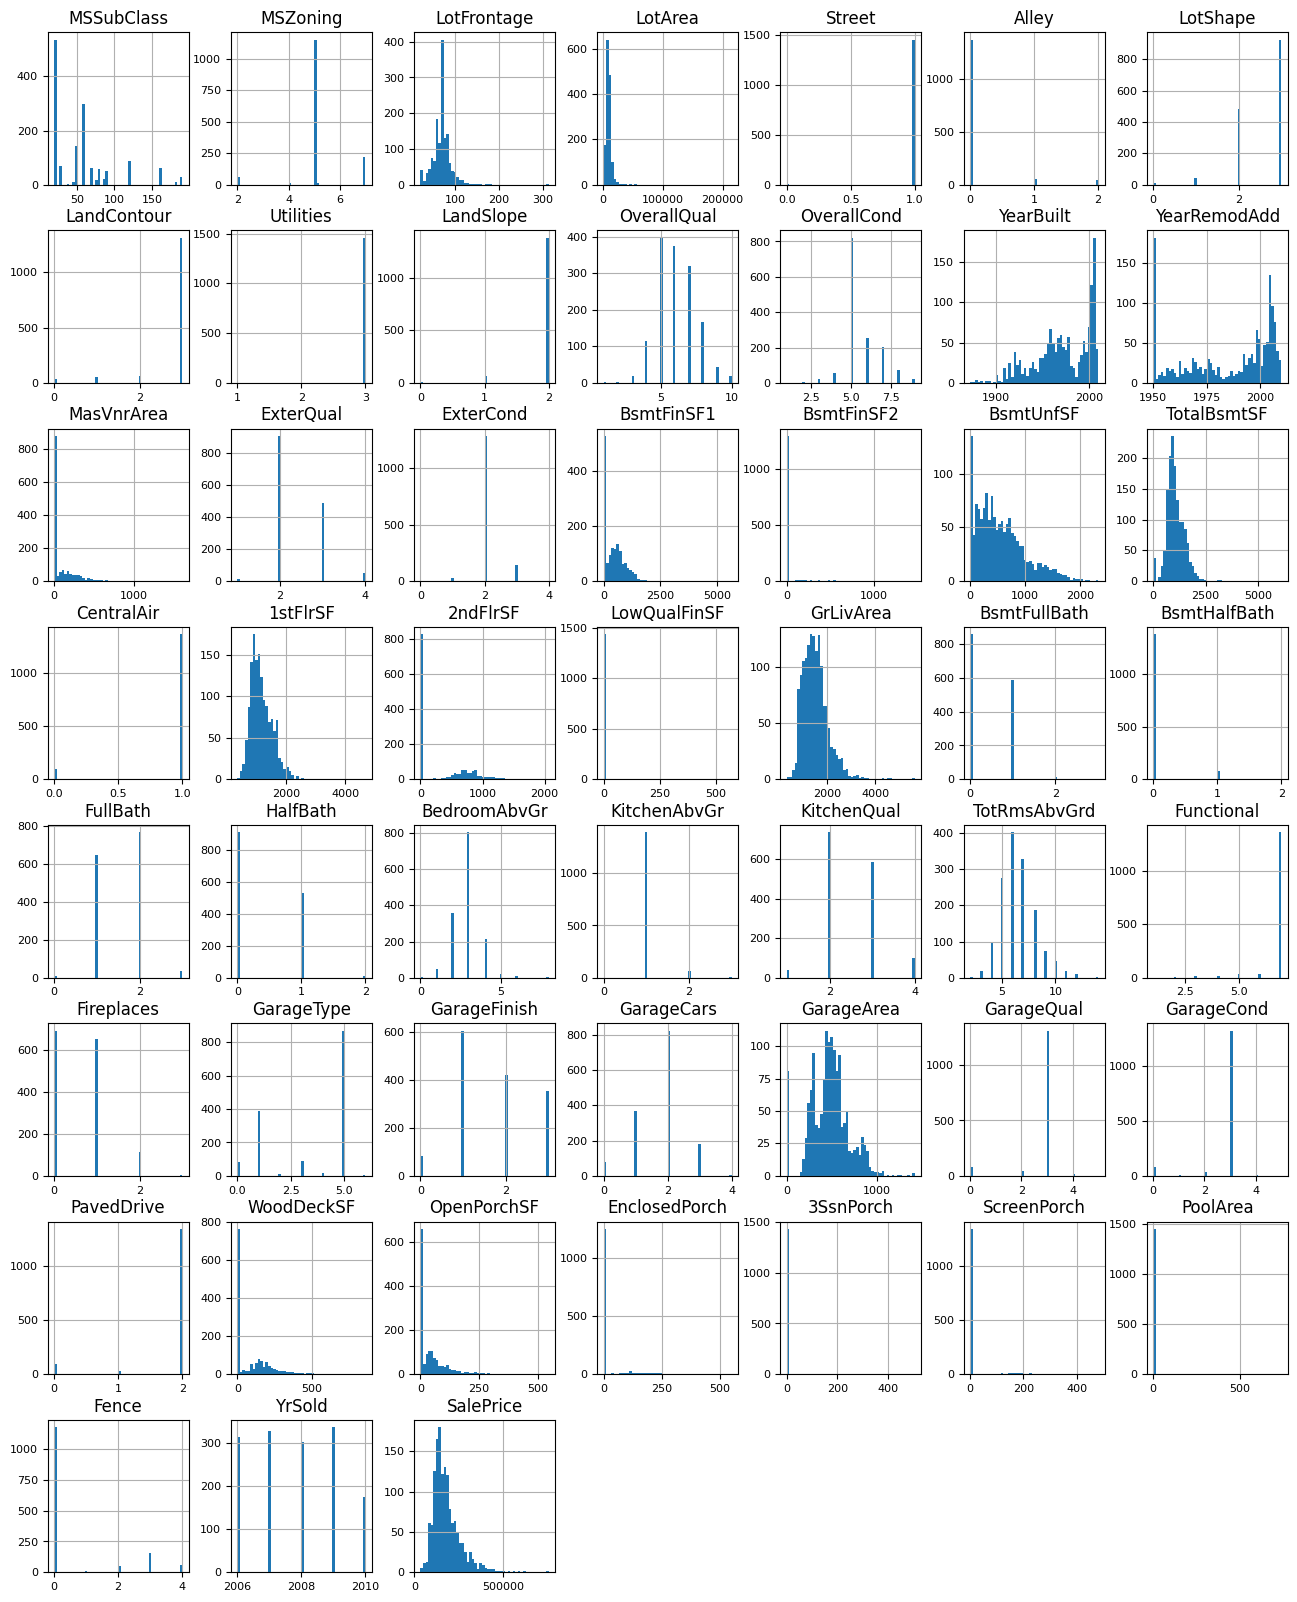

In [23]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Based on these distributions it seems there are several more features we can eliminate for having little or no differentiation, including:

Street, Alley, LandContour, Utilities, LandSlope, MasVnrArea, BsmtFinSF2, CentralAir, 2ndFlrSF, LowQualFinSF, BsmtHalfBath, Functional, GarageCond, PavedDrive, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, and Fence.

Also choosing to eliminate 1stFlrSF because it correlates substantially with GrLivArea.

In [24]:
df_num = df_num.drop([ 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'MasVnrArea', 'BsmtFinSF2', 'CentralAir',
                      '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'Functional', 'GarageCond', 'PavedDrive',
                       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence'], axis=1)
df_num_test = df_num_test.drop([ 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'MasVnrArea', 'BsmtFinSF2', 'CentralAir',
                      '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'Functional', 'GarageCond', 'PavedDrive',
                       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence'], axis=1)
print(df_num.shape)
print(df_num_test.shape)

(1460, 33)
(1459, 32)


--------------------------------------------------------------------------------

Now let's use a Random Forest to do important feature determination....

In [25]:
X_train = df_num.iloc[:,:-1]
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,YrSold
0,60,5.0,65.0,8450,1,3,7,5,2003,2003,...,8,0,5,2,2,548,3,0,61,2008
1,20,5.0,80.0,9600,1,3,6,8,1976,1976,...,6,1,5,2,2,460,3,298,0,2007
2,60,5.0,68.0,11250,1,2,7,5,2001,2002,...,6,1,5,2,2,608,3,0,42,2008
3,70,5.0,60.0,9550,1,2,7,5,1915,1970,...,7,1,1,1,3,642,3,0,35,2006
4,60,5.0,84.0,14260,1,2,8,5,2000,2000,...,9,1,5,2,3,836,3,192,84,2008


In [26]:
y_train = df_num.iloc[:,-1:]
y_train.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


Bring features to same scale

In [27]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_train_norm

array([[0.23529412, 0.6       , 0.15068493, ..., 0.        , 0.11151737,
        0.5       ],
       [0.        , 0.6       , 0.20205479, ..., 0.34772462, 0.        ,
        0.25      ],
       [0.23529412, 0.6       , 0.1609589 , ..., 0.        , 0.07678245,
        0.5       ],
       ...,
       [0.29411765, 0.6       , 0.15410959, ..., 0.        , 0.10968921,
        1.        ],
       [0.        , 0.6       , 0.1609589 , ..., 0.42707118, 0.        ,
        1.        ],
       [0.        , 0.6       , 0.18493151, ..., 0.8588098 , 0.12431444,
        0.5       ]])

RF feature importance graph

 1) GrLivArea                      0.067610
 2) LotArea                        0.067401
 3) TotalBsmtSF                    0.064211
 4) BsmtUnfSF                      0.062867
 5) GarageArea                     0.062134
 6) YearBuilt                      0.057672
 7) LotFrontage                    0.056942
 8) YearRemodAdd                   0.052186
 9) BsmtFinSF1                     0.051438
10) OpenPorchSF                    0.043275
11) WoodDeckSF                     0.041467
12) YrSold                         0.039288
13) TotRmsAbvGrd                   0.035635
14) OverallQual                    0.029832
15) OverallCond                    0.027475
16) MSSubClass                     0.025482
17) BedroomAbvGr                   0.022991
18) GarageFinish                   0.021209
19) Fireplaces                     0.020269
20) LotShape                       0.019542
21) KitchenQual                    0.016032
22) GarageType                     0.015984
23) BsmtFullBath                

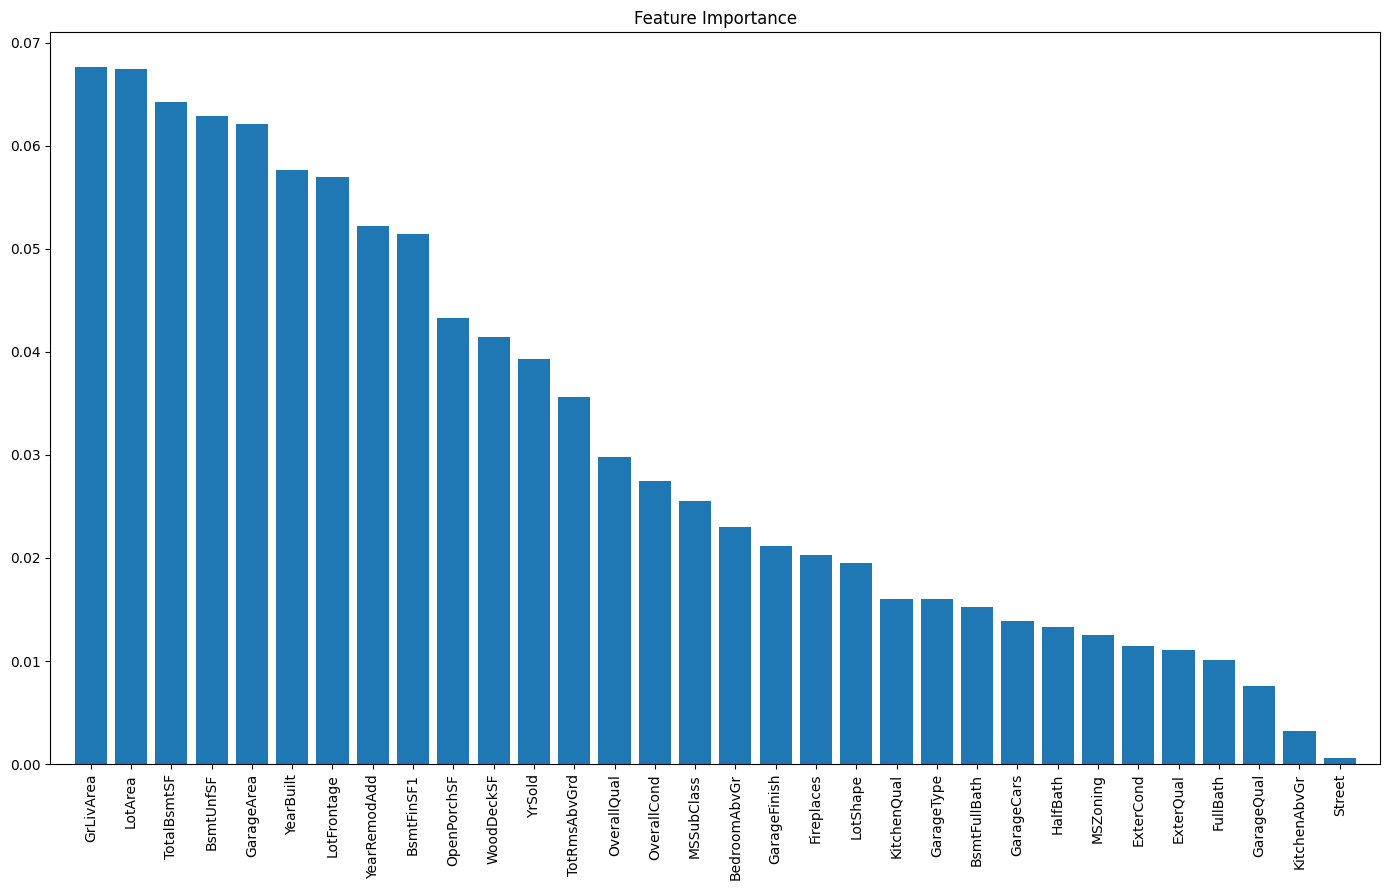

In [28]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

feat_labels = df_num.columns[:-1]
#print(feat_labels)
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, np.ravel(y_train))
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.figure(figsize=(14, 9))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


In [29]:
# This uses up gigs of instance memory, need to delete
forest = None

Based on this analysis the 10 most important features are:

GrLivArea, LotArea, TotalBsmtSF, BsmtUnfSF, GarageArea, YearBuilt, LotFrontage, YearRemodAdd, BsmtFinSF1, OpenPorchSF

Beyond these 10 features the importance drops off quickly.

-------------------------------------------------------------------------------

Now let's do PCA.  First create a standardized dataset

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_train_std

array([[ 0.07337496, -0.15635022, -0.22937175, ..., -0.75217584,
         0.21650316,  0.13877749],
       [-0.87256276, -0.15635022,  0.4519361 , ...,  1.62619479,
        -0.70448325, -0.61443862],
       [ 0.07337496, -0.15635022, -0.09311018, ..., -0.75217584,
        -0.07036146,  0.13877749],
       ...,
       [ 0.30985939, -0.15635022, -0.18395123, ..., -0.75217584,
         0.20140502,  1.64520971],
       [-0.87256276, -0.15635022, -0.09311018, ...,  2.16891024,
        -0.70448325,  1.64520971],
       [-0.87256276, -0.15635022,  0.22483348, ...,  5.12192075,
         0.32219013,  0.13877749]])

In [31]:
# compute eigen values/vectors with numpy
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)

[8.05583302 2.780317   2.23428231 1.73366691 1.62281303 1.42545864
 1.25787672 1.1150984  1.06875178 1.01715367 0.96612394 0.83838759
 0.77674786 0.75427752 0.04022801 0.68210421 0.64008018 0.61558339
 0.0891785  0.10859171 0.55520726 0.54028045 0.16133972 0.45626468
 0.41227322 0.39608834 0.36308568 0.22174861 0.24358313 0.26428595
 0.30497003 0.28025134]


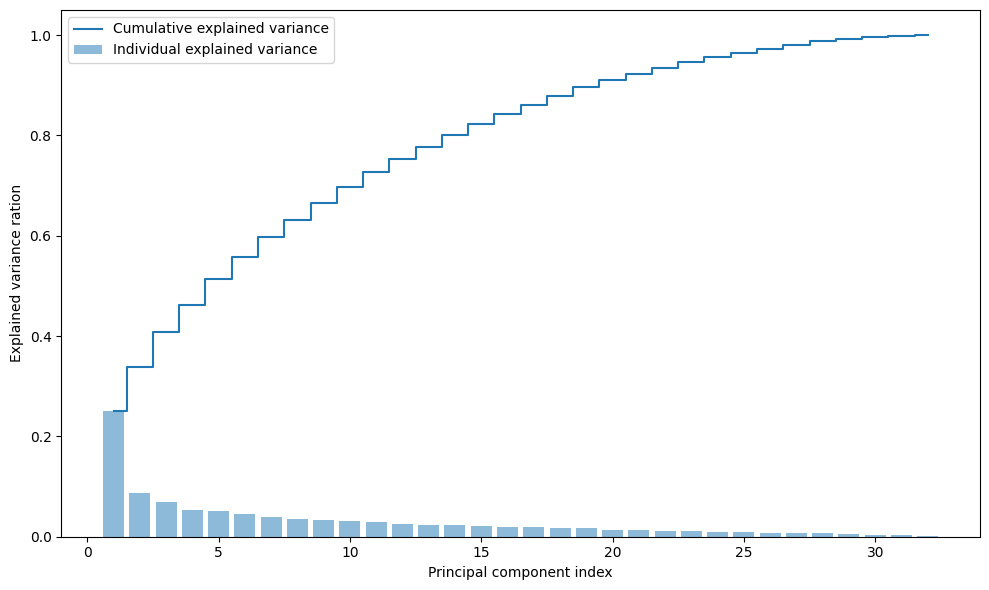

In [32]:
# plotting total and explained variance
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 6))
plt.bar(range(1,33), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,33), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ration')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Above indicates with our reduced feature set the first principal component accounts for 25% of the variance, then approximately 10, 8, 7, 6, 5, etc...

It also indicates it takes about 13-14 principle components to account for 80% of the variance.  But 10 principle components get us to about 70%.

This is interesting, but PCA is an unsupervised learning technique to compress features to a set number of principal components by transforming the input features.  So it isn't really useful for feature selection as such, but can be used when building a model and as a technique to transform an input feature set for evaluation into principal components, so will revist later.

For now let's output the top 10 preprocessed features of the test and train files for use in model development

In [34]:
df_num = df_num[['GrLivArea', 'LotArea', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageArea', 'YearBuilt',
                 'LotFrontage', 'YearRemodAdd', 'BsmtFinSF1', 'OpenPorchSF','SalePrice']]

df_num_test = df_num_test[['GrLivArea', 'LotArea', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageArea', 'YearBuilt',
                 'LotFrontage', 'YearRemodAdd', 'BsmtFinSF1', 'OpenPorchSF']]



Took Help of the following link for the lasso regression.

https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

In [35]:
df_num_test.shape
df_num.shape

(1460, 11)

In [36]:
df_num_test.shape

(1459, 10)

In [37]:
df_num.iloc[ :,0:10]

,GrLivArea,LotArea,TotalBsmtSF,BsmtUnfSF,GarageArea,YearBuilt,LotFrontage,YearRemodAdd,BsmtFinSF1,OpenPorchSF
0,1710,8450,856,150,548,2003,65.0,2003,706,61
1,1262,9600,1262,284,460,1976,80.0,1976,978,0
2,1786,11250,920,434,608,2001,68.0,2002,486,42
3,1717,9550,756,540,642,1915,60.0,1970,216,35
4,2198,14260,1145,490,836,2000,84.0,2000,655,84
...,...,...,...,...,...,...,...,...,...,...
1455,1647,7917,953,953,460,1999,62.0,2000,0,40
1456,2073,13175,1542,589,500,1978,85.0,1988,790,0
1457,2340,9042,1152,877,252,1941,66.0,2006,275,60
1458,1078,9717,1078,0,240,1950,68.0,1996,49,0


In [38]:
df_num["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [39]:
#preview
from sklearn.model_selection import train_test_split
#X and y values
X = df_num.iloc[ :,0:10]
y = df_num["SalePrice"]

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


The dimension of X_train is (1022, 10)
The dimension of X_test is (438, 10)


In [45]:
#Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))



The train score for lr model is 0.7785774336992609
The test score for lr model is 0.623420816160835

Ridge Model............................................

The train score for ridge model is 0.7785506668253247
The test score for ridge model is 0.6241371625470581


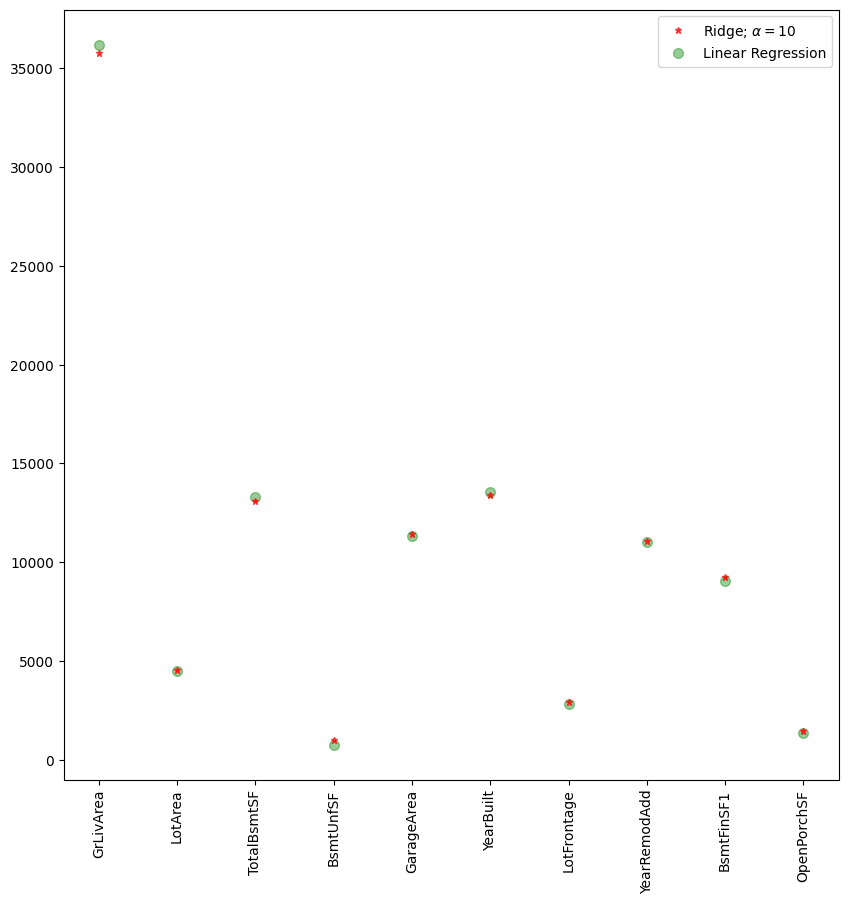

In [44]:
plt.figure(figsize = (10, 10))
plt.plot(df_num_test.columns,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(df_num_test.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()


In [43]:
#Lasso regression model
print("\nLasso Model\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Lasso Model

The train score for ls model is 0.7785772145813733
The test score for ls model is 0.6234950965590713


<Axes: >

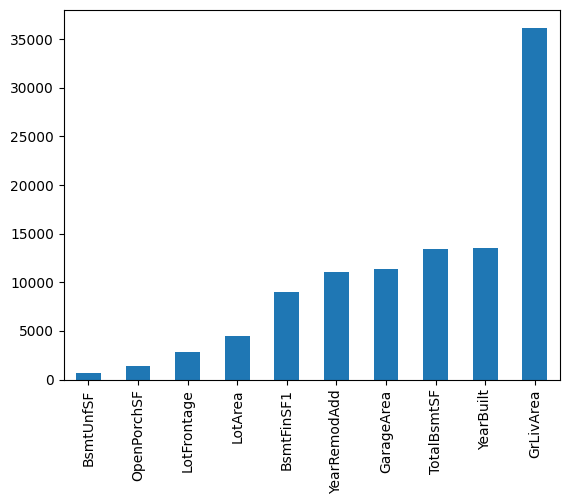

In [46]:
pd.Series(lasso.coef_,df_num_test.columns).sort_values(ascending = True).plot(kind = "bar")


In [48]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))
print(lasso_cv.predict(X_test))

0.7785774336992609
0.6234208169063213
[296761.18431879 130265.45078379 104613.45412304 221704.57307745
  93861.79338609 110685.73817855 245802.06981061 121486.11269327
 516219.43677591 153778.45351685 195900.22566341 204832.20839531
 235683.69592523 116243.05663641 108114.31326836 151652.47630926
 225997.36470447 131015.79543627 155470.55413958 156284.98199382
 153195.39289327 149581.80447541 106214.21484919 164229.84027917
 200227.63742963 157898.7532834  188423.36090656  51549.9748087
 278919.1119451  114481.83616416 212600.19480882 201528.97847511
 135995.62298983 280601.98188744 294312.98745472 184420.54148514
 242527.11468992 114259.70047101 242790.5890082  316286.680898
 238520.70929246 124873.25917116 186516.94819203 296130.10505133
 341931.11485785 188338.79497334 126031.36312157 113532.96882061
 179465.19641617  84102.18391151 334199.67252744 146855.88474733
 189964.16034554  56883.99654899 241667.86467193 111226.87492799
 112139.46377831 231883.90317178 145501.6526625   66900

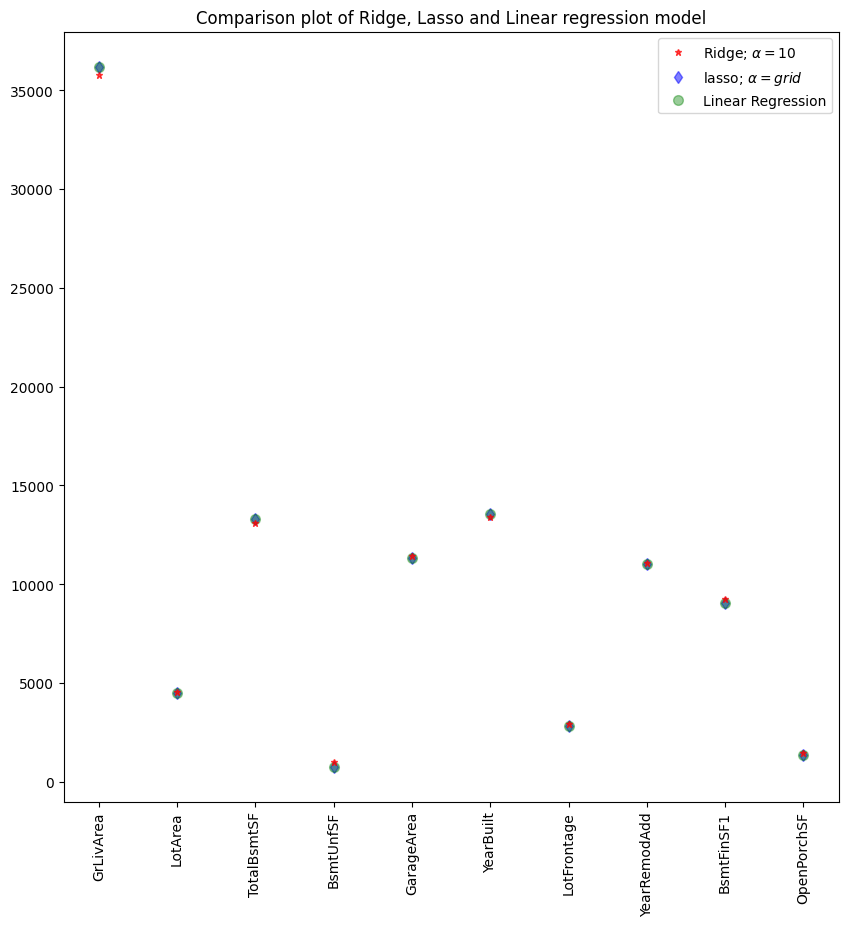

In [49]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(df_num_test.columns,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(df_num_test.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()
